# Exploring Patterns and Predictors in Patient Data to Uncover the Secrets of Sepsis Occurance. 

# Intro

## General

In the realm of healthcare, understanding the complex dynamics behind the occurrence of life-threatening conditions is of paramount importance. Sepsis, a potentially fatal condition resulting from the body's extreme response to an infection, remains a major challenge for healthcare providers worldwide. Unraveling the secrets of sepsis occurrence can lead to improved early detection, timely interventions, and ultimately, better patient outcomes.

This project aims to delve into the vast pool of patient data, harnessing the power of data analysis and machine learning, to explore patterns and predictors associated with sepsis occurrence. By leveraging advanced computational techniques and drawing insights from comprehensive patient records, this research endeavor seeks to uncover hidden correlations, risk factors, and potential early warning signs that can facilitate earlier diagnosis and intervention.


## Hypothesis

- Hypothesis: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.
Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.

- Hypothesis: Abnormal blood work results, such as high values of PL, SK, and BD2, are indicative of a higher likelihood of sepsis.
Justification: Abnormal blood work results may indicate an ongoing infection or an inflammatory response, which are key factors in sepsis development.

- Hypothesis: Older patients are more likely to develop sepsis compared to younger patients.
Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.

- Hypothesis: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.
Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.

- Hypothesis: Patients without valid insurance cards are more likely to develop sepsis.
Justification: Lack of access to healthcare, as indicated by the absence of valid insurance, may delay or hinder early detection and treatment of infections, potentially increasing the risk of sepsis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

#Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


#Evaluation metrics
from sklearn.metrics import f1_score,roc_curve, auc,roc_auc_score
#saving model                            
import pickle

import warnings
warnings.filterwarnings('ignore')

# Other packages
import os

In [2]:
# Data handling
#import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
...

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...


Ellipsis

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [6]:
urls = {
    "train": "https://raw.githubusercontent.com/aliduabubakari/Sepsis-Classification-with-FastAPI/main/Data/Paitients_Files_Train.csv",
    "test": "https://raw.githubusercontent.com/aliduabubakari/Sepsis-Classification-with-FastAPI/main/Data/Paitients_Files_Test.csv"
}

train = pd.read_csv(urls["train"])
test = pd.read_csv(urls["test"])

# Print the first few rows of the DataFrame
print(train.head())


          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


- ID: Unique number to represent patient ID

- PRG: Plasma glucose

- PL: Blood Work Result-1 (mu U/ml)

- PR: Blood Pressure (mm Hg)

- SK: Blood Work Result-2 (mm)

- TS: Blood Work Result-3 (mu U/ml)

- M11: Body mass index (weight in kg/(height in m)^2

- BD2: Blood Work Result-4 (mu U/ml)

- Age	: patients age (years)

- Insurance: If a patient holds a valid insurance card

- Sepssis; Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [7]:
#Check dataset dimension 
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of rows: 599
Number of columns: 11


In [8]:
#Explore the summary statistics of numerical columns:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [6]:
train.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

#### Univariate Analysis 

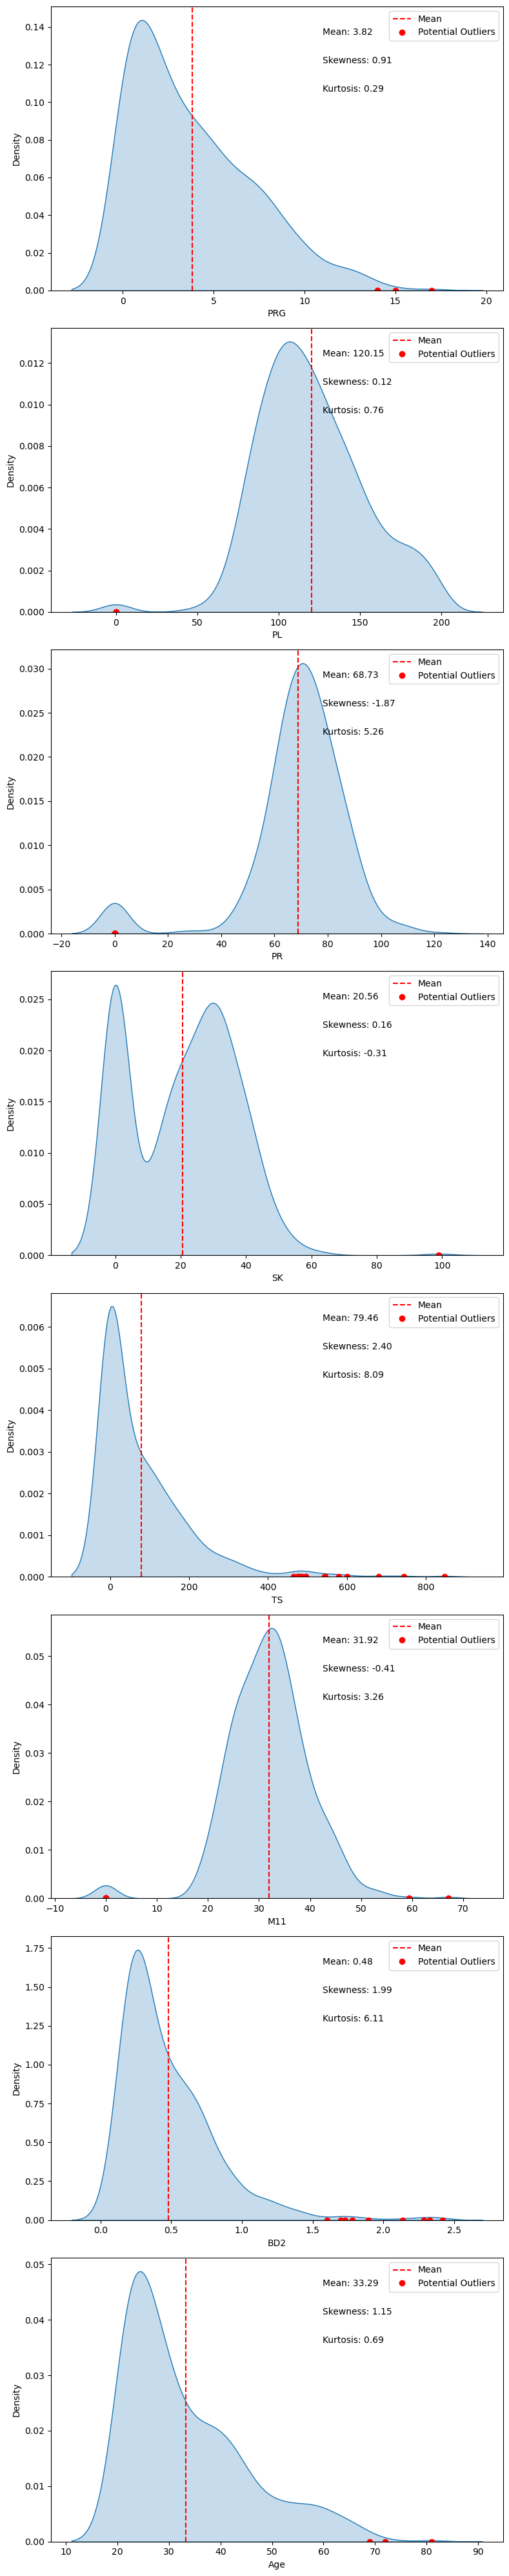

In [9]:
# Select columns to plot
cols_to_plot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(8, 40))
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=train, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = train[col].mean()
    skewness_val = train[col].skew()
    kurtosis_val = train[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = train[(train[col] > mean_val + 3 * train[col].std()) | (train[col] < mean_val - 3 * train[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()


- Based on the KDE plot analysis of the PRG variable, it appears that the distribution is positively skewed, suggesting the presence of some higher values. The distribution is also platykurtic, indicating a flatter peak and lighter tails compared to a normal distribution.

- Based on the KDE plot analysis of the PL variable, it appears that the distribution is approximately symmetric, with a mean value of 120.15. The distribution is mesokurtic, suggesting a similar shape to a normal distribution. 

- The kde plot suggests that the blood pressure distribution is negatively skewed and has a more peaked shape with possible outliers.

- The kde plot suggests that the distribution of blood work result 2 is slightly positively skewed and has a flatter shape.This suggests that the distribution has fewer outliers or extreme values.

- The kde plot suggests that the distribution of TS (blood work result 3) is positively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the right, indicating a higher frequency of lower values compared to higher values.This suggests that the distribution has more outliers or extreme values.

 - The kde plot suggests that the distribution of body mass index is slightly negatively skewed and has a more peaked shape with heavier tails.This means that the tail of the distribution is extended to the left, indicating a higher frequency of higher values compared to lower values. This suggests that the distribution has more outliers or extreme values.
 
- The kde plot indicates a positively skewed distribution for the blood work result with a more peaked shape and heavier tails.This indicates a higher frequency of extreme values or outliers.This means that the tail of the distribution is extended to the right, suggesting a higher frequency of lower values compared to higher values.

- The kde plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals. This indicates a more uniform spread of values without significant outliers or extreme values.This suggests that the tail of the distribution is extended to the right, indicating a higher frequency of younger individuals compared to older individuals.

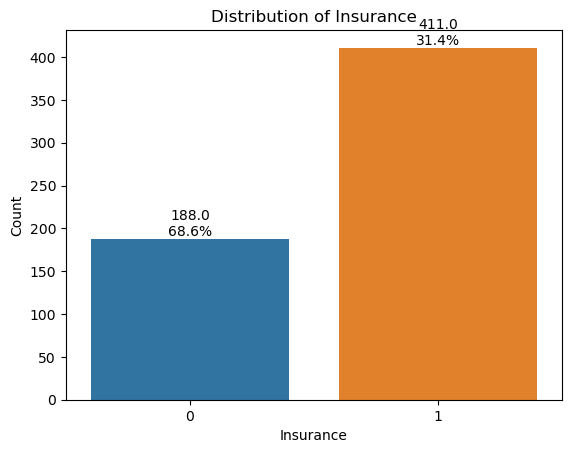

In [10]:
# Count plot for "Insurance"
sns.countplot(data=train, x='Insurance')

# Set labels
plt.xlabel('Insurance')
plt.ylabel('Count')

# Set title
plt.title('Distribution of Insurance')

# Calculate percentage distribution
total = len(train['Insurance'])
percentages = train['Insurance'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


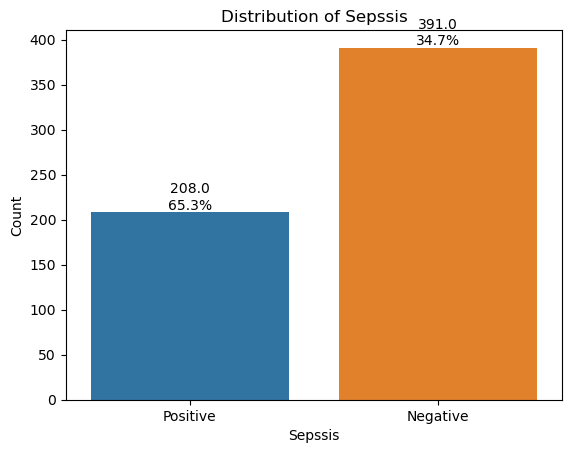

In [11]:
# Count plot for "Sepssis"
sns.countplot(data=train, x='Sepssis')

# Set labels
plt.xlabel('Sepssis')
plt.ylabel('Count')

# Set title
plt.title('Distribution of Sepssis')

# Calculate percentage distribution
total = len(train['Sepssis'])
percentages = train['Sepssis'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


##### Outlier Analysis 

#### Univariate Analysis 

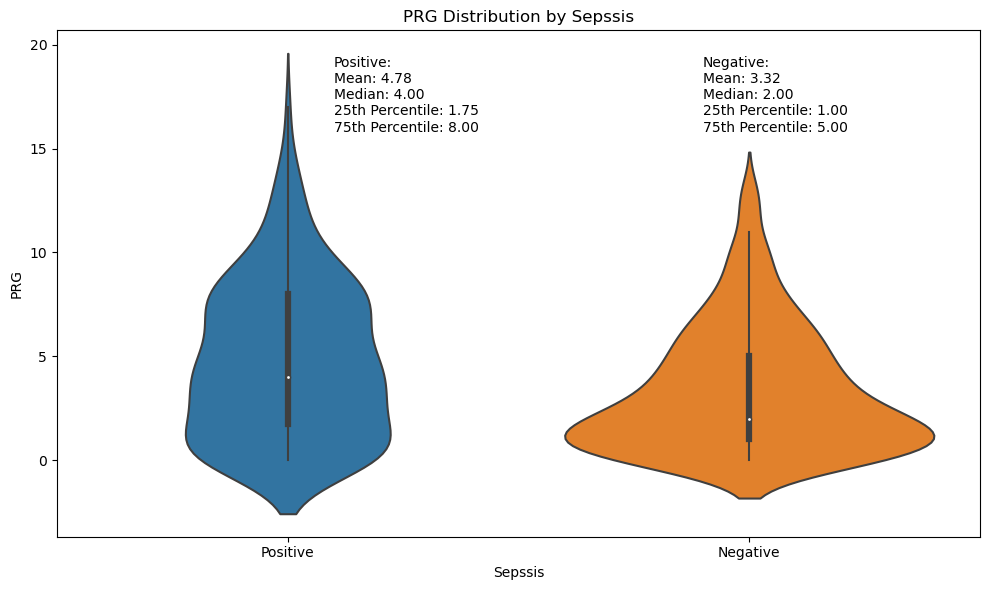

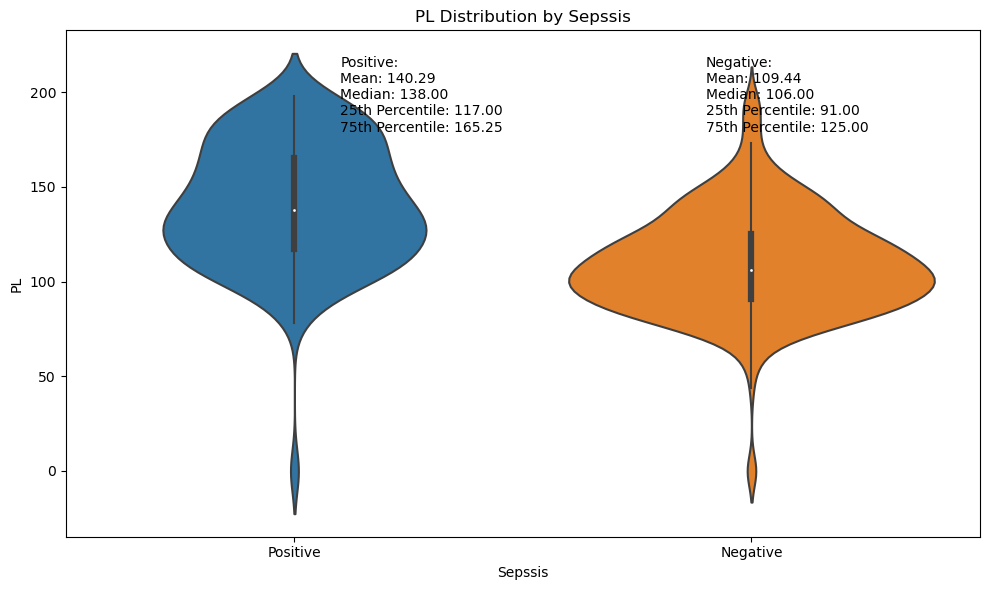

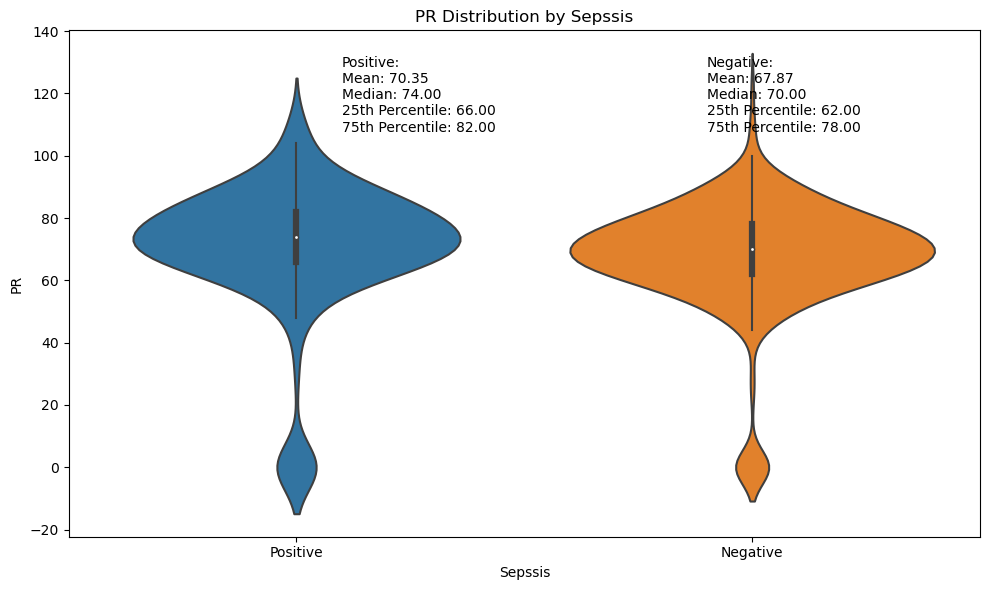

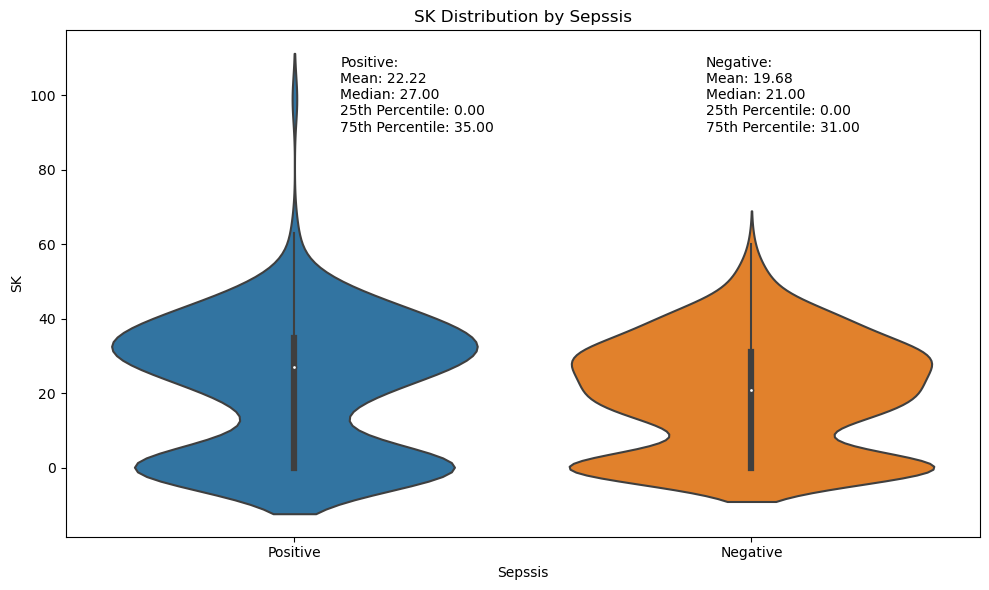

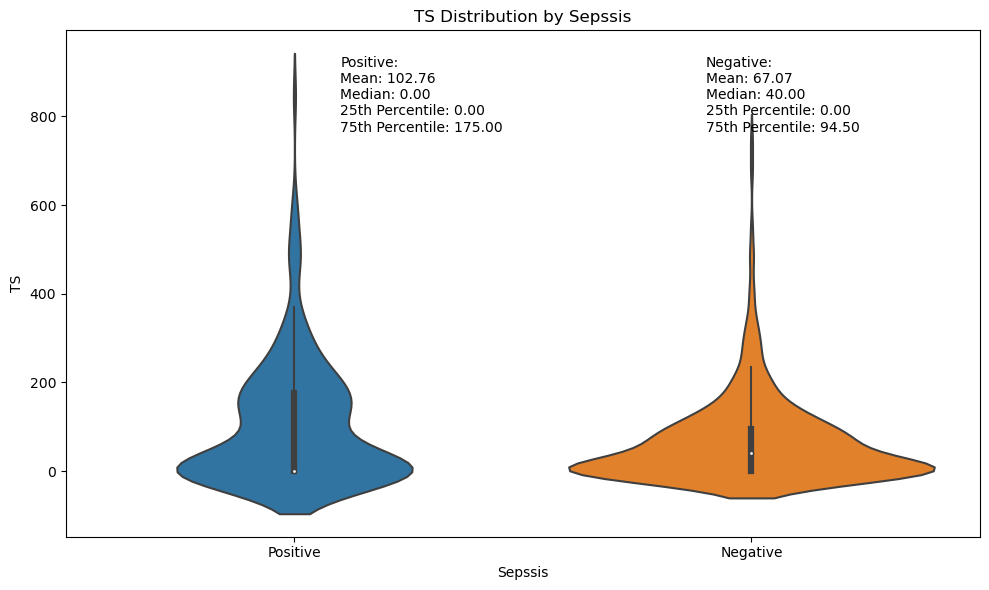

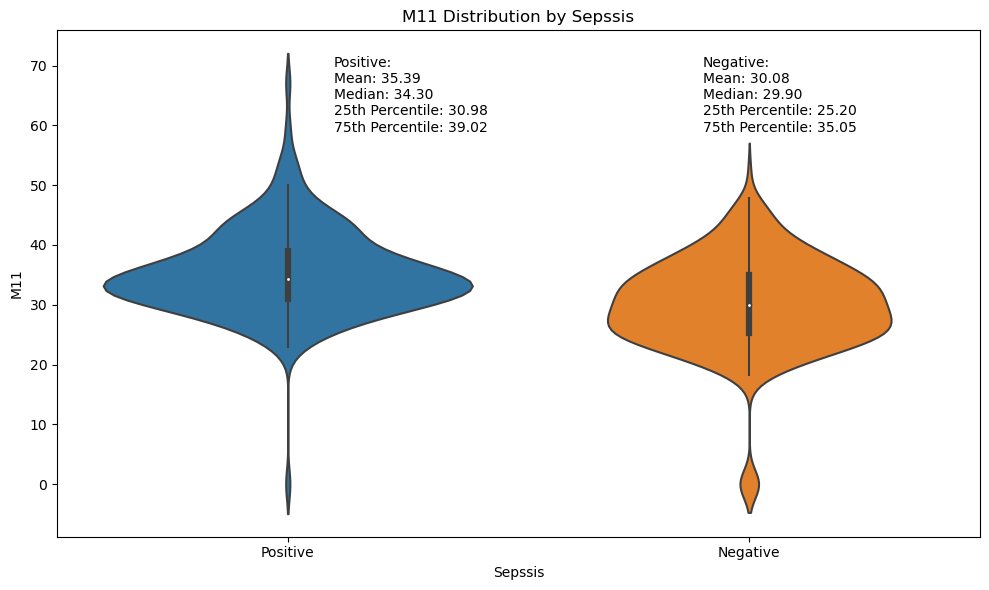

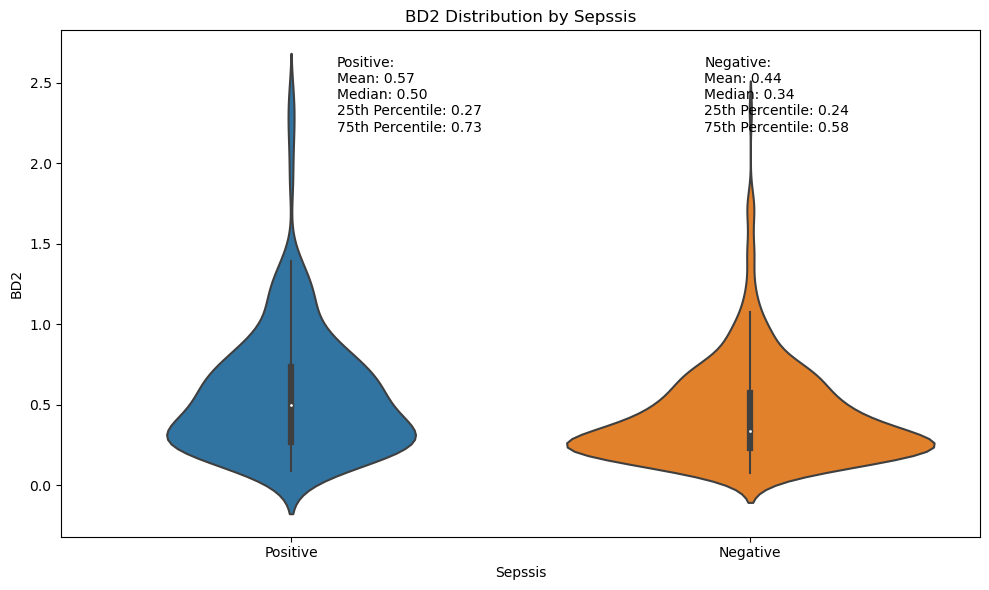

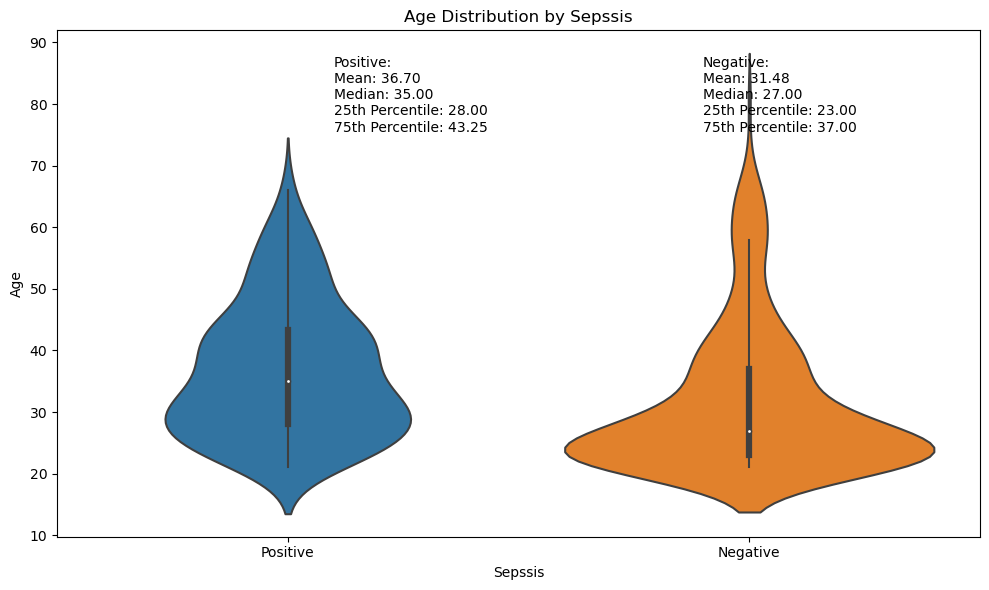

In [10]:
# Numerical Variables - Violin plots with statistics
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')
    
    # Calculate statistics
    positive_vals = df[df['Sepssis'] == 'Positive'][var]
    negative_vals = df[df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }
    
    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes)
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()



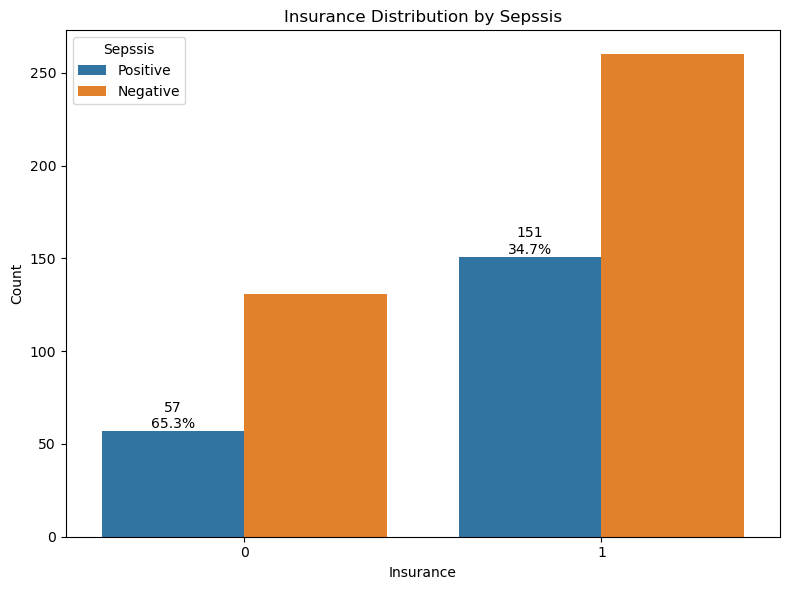

In [11]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Sepssis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(df['Sepssis'])
    percentages = df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [12]:
# Encoding the target variable
df['Sepssis_Encoded'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

# Calculate correlation coefficients
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Print correlation coefficients
for var in numerical_vars:
    correlation = correlations.loc[var, 'Sepssis_Encoded']
    print(f"Pearson correlation between 'Sepssis_Encoded' and '{var}': {correlation:.2f}")


Pearson correlation between 'Sepssis_Encoded' and 'PRG': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'PL': 0.45
Pearson correlation between 'Sepssis_Encoded' and 'PR': 0.06
Pearson correlation between 'Sepssis_Encoded' and 'SK': 0.08
Pearson correlation between 'Sepssis_Encoded' and 'TS': 0.15
Pearson correlation between 'Sepssis_Encoded' and 'M11': 0.32
Pearson correlation between 'Sepssis_Encoded' and 'BD2': 0.18
Pearson correlation between 'Sepssis_Encoded' and 'Age': 0.21
Pearson correlation between 'Sepssis_Encoded' and 'Insurance': 0.06


Let's analyze the correlations between the 'Sepssis_Encoded' variable and each of the other variables:

1. 'PRG': The correlation coefficient of 0.21 suggests a weak positive correlation between plasma glucose levels and the likelihood of developing sepsis. However, the correlation is not very strong.

2. 'PL': The correlation coefficient of 0.45 indicates a moderate positive correlation between attribute 2 (blood work result-1) and the likelihood of developing sepsis. This suggests that higher values of PL are associated with a higher likelihood of sepsis.

3. 'PR': The correlation coefficient of 0.06 indicates a very weak positive correlation between blood pressure and the likelihood of developing sepsis. The correlation is close to zero, suggesting that there is no meaningful relationship between these variables.

4. 'SK': The correlation coefficient of 0.08 suggests a very weak positive correlation between attribute 4 (blood work result-2) and the likelihood of developing sepsis. The correlation is close to zero, indicating no significant relationship.

5. 'TS': The correlation coefficient of 0.15 indicates a weak positive correlation between attribute 5 (blood work result-3) and the likelihood of developing sepsis. The correlation is not very strong, suggesting a limited relationship.

6. 'M11': The correlation coefficient of 0.32 indicates a moderate positive correlation between body mass index (BMI) and the likelihood of developing sepsis. This suggests that higher BMI values are associated with a higher likelihood of sepsis.

7. 'BD2': The correlation coefficient of 0.18 suggests a weak positive correlation between attribute 7 (blood work result-4) and the likelihood of developing sepsis. The correlation is not very strong, indicating a limited relationship.

8. 'Age': The correlation coefficient of 0.21 suggests a weak positive correlation between age and the likelihood of developing sepsis. This implies that older patients may have a slightly higher likelihood of sepsis.

9. 'Insurance': The correlation coefficient of 0.06 indicates a very weak positive correlation between insurance status and the likelihood of developing sepsis. The correlation is close to zero, suggesting no significant relationship.

###### In summary, the analysis of the correlations suggests that attributes such as PL, M11 (BMI), and age may have a moderate positive correlation with the likelihood of developing sepsis. However, the other variables have either weak or very weak correlations, indicating limited or no meaningful relationship with sepsis development.

#### Multivariate Analysis 

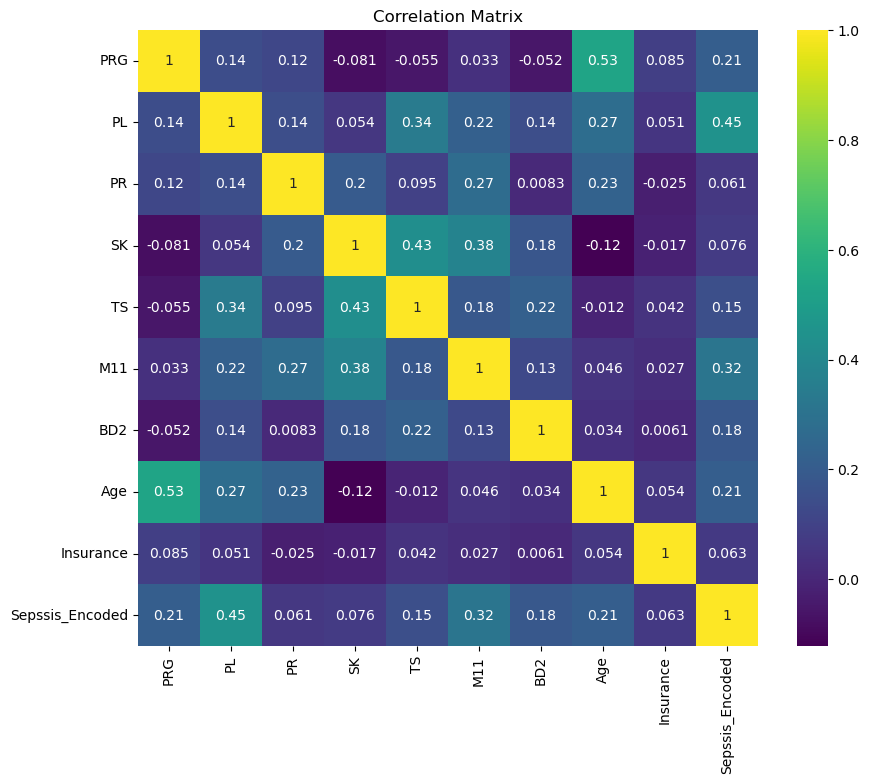

In [13]:
# Calculate correlation matrix
correlations = df[numerical_vars + ['Sepssis_Encoded']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


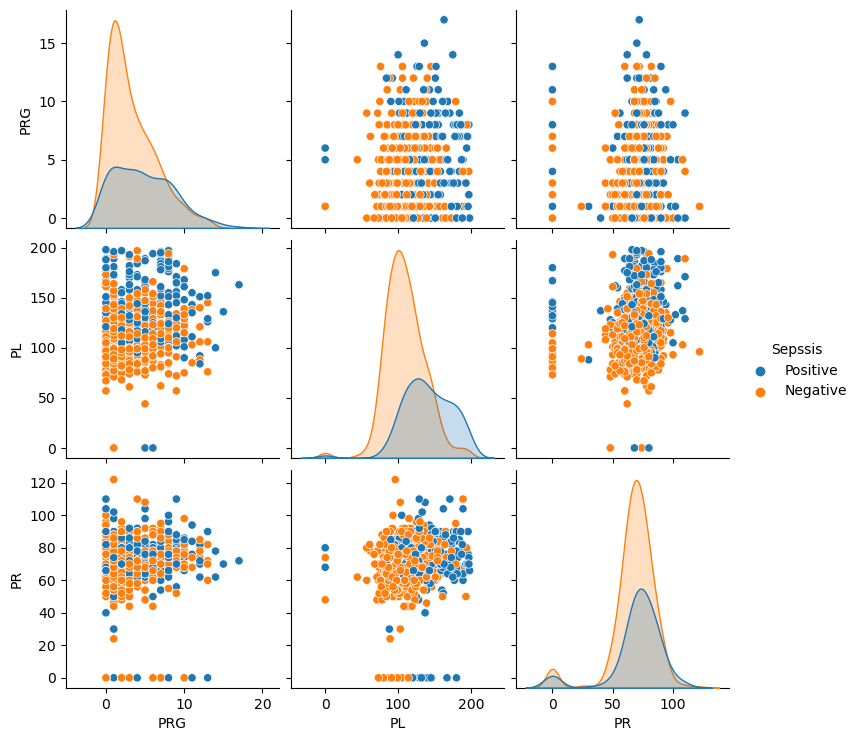

In [14]:
numerical_vars = ['PRG', 'PL', 'PR']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

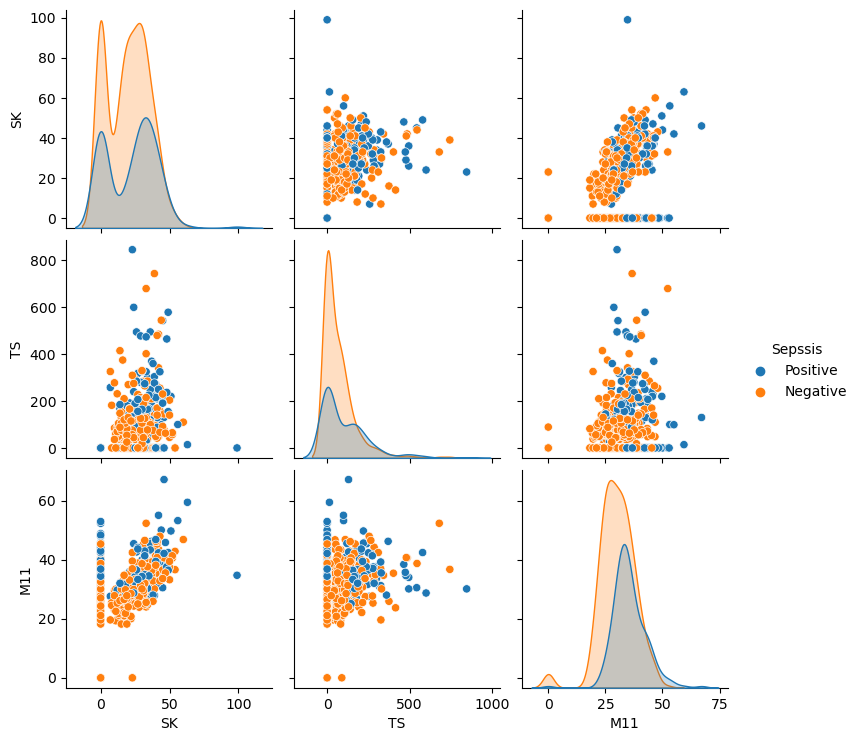

In [15]:
numerical_vars = ['SK', 'TS', 'M11']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

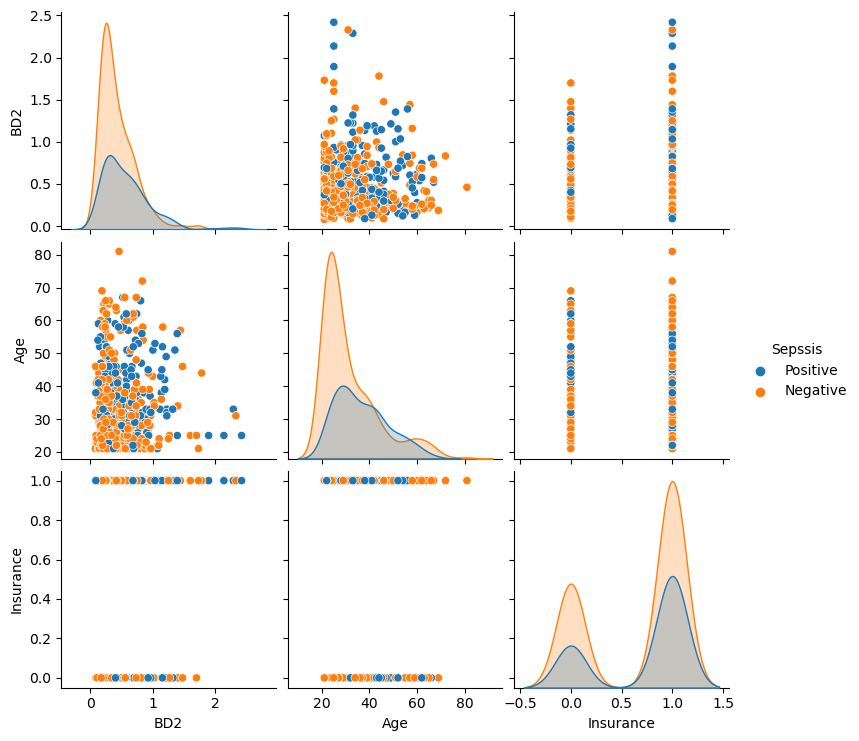

In [16]:
numerical_vars = ['BD2', 'Age', 'Insurance']
sns.pairplot(data=df, vars=numerical_vars, hue='Sepssis')

## Hypothesis Testing  

### - Hypothesis 1: Higher plasma glucose levels (PRG) are associated with an increased risk of developing sepsis.

Justification: Elevated glucose levels have been linked to impaired immune function and increased susceptibility to infections, including sepsis.

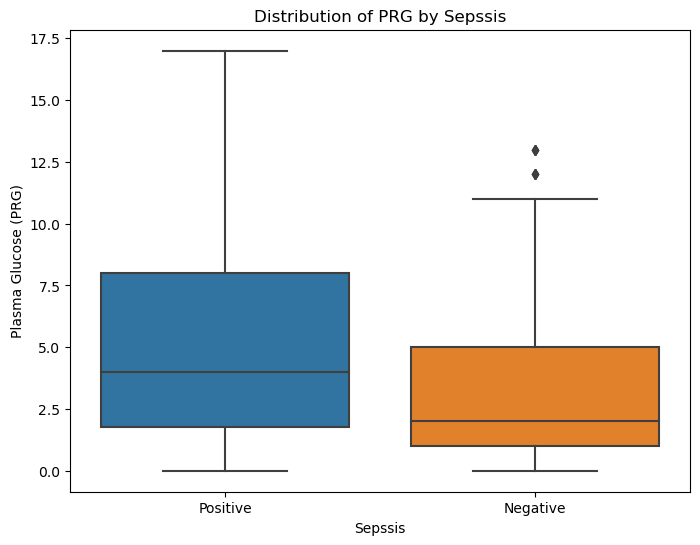

Positive Group:
Mean PRG: 4.778846153846154
Median PRG: 4.0
Standard Deviation: 3.7557215116186895

Negative Group:
Mean PRG: 3.317135549872123
Median PRG: 2.0
Standard Deviation: 3.0181821629514967

T-Statistic: 5.172721512358376
P-Value: 3.154172341568826e-07


In [17]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Compare PRG distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='PRG')
plt.xlabel('Sepssis')
plt.ylabel('Plasma Glucose (PRG)')
plt.title('Distribution of PRG by Sepssis')
plt.show()

# Calculate summary statistics
positive_prg = positive_group['PRG']
negative_prg = negative_group['PRG']

positive_mean = positive_prg.mean()
positive_median = positive_prg.median()
positive_std = positive_prg.std()

negative_mean = negative_prg.mean()
negative_median = negative_prg.median()
negative_std = negative_prg.std()

print('Positive Group:')
print('Mean PRG:', positive_mean)
print('Median PRG:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean PRG:', negative_mean)
print('Median PRG:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_prg, negative_prg)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


###### Based on the provided:

- Mean PRG (Plasma Glucose) in the Positive Group (patients with sepsis) is 4.78, while in the Negative Group (patients without sepsis) it is 3.32. This suggests that, on average, patients with sepsis tend to have higher plasma glucose levels compared to those without sepsis.

- The median PRG in the Positive Group is 4.0, whereas in the Negative Group it is 2.0. The median represents the middle value of a dataset, and it is less affected by extreme values. This further supports the observation that the central tendency of plasma glucose levels is higher in the Positive Group.

- The standard deviation of PRG in the Positive Group is 3.76, and in the Negative Group, it is 3.02. The standard deviation measures the dispersion of data points around the mean. In this case, both groups have relatively high standard deviations, indicating considerable variability in plasma glucose levels within each group.

- The t-statistic is 5.17, which indicates a significant difference between the means of the Positive and Negative Groups. A larger absolute t-statistic suggests a stronger evidence of a difference between the groups.

- The p-value is 3.15e-07, which is very small. This indicates strong evidence against the null hypothesis (no difference between the groups) and suggests that the difference in mean plasma glucose levels between the groups is statistically significant. In other words, there is a significant association between higher plasma glucose levels and the risk of developing sepsis.

### -  Hypothesis 2: Abnormal blood work results, such as high values of PL, SK, and BD2, are indicative of a higher likelihood of sepsis.
Justification: Abnormal blood work results may indicate an ongoing infection or an inflammatory response, which are key factors in sepsis development.

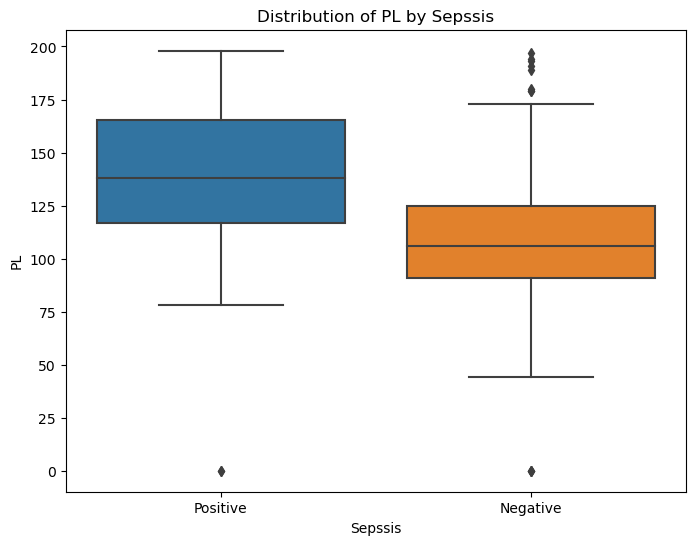

Positive Group (PL):
Mean: 140.28846153846155
Median: 138.0
Standard Deviation: 32.80072259040371

Negative Group (PL):
Mean: 109.44245524296676
Median: 106.0
Standard Deviation: 27.120455674778167

T-Statistic: 12.302534453051374
P-Value: 3.678522495138333e-31
---------------------------


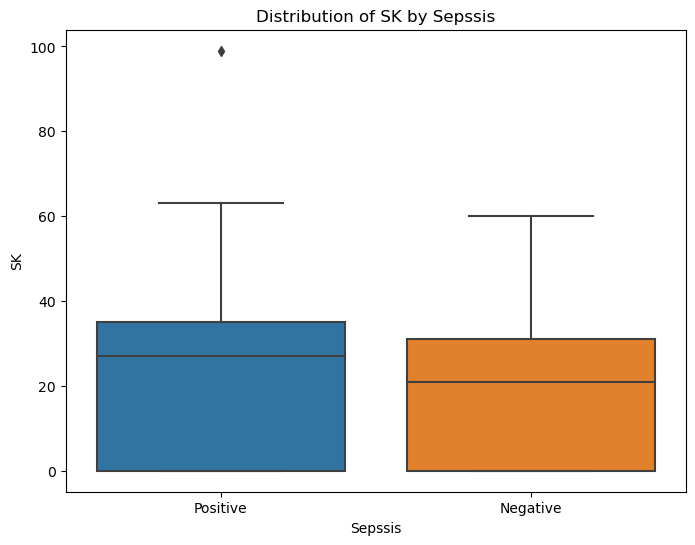

Positive Group (SK):
Mean: 22.221153846153847
Median: 27.0
Standard Deviation: 17.882578211575797

Negative Group (SK):
Mean: 19.680306905370845
Median: 21.0
Standard Deviation: 14.880122549396368

T-Statistic: 1.852114423904815
P-Value: 0.06450285034380407
---------------------------


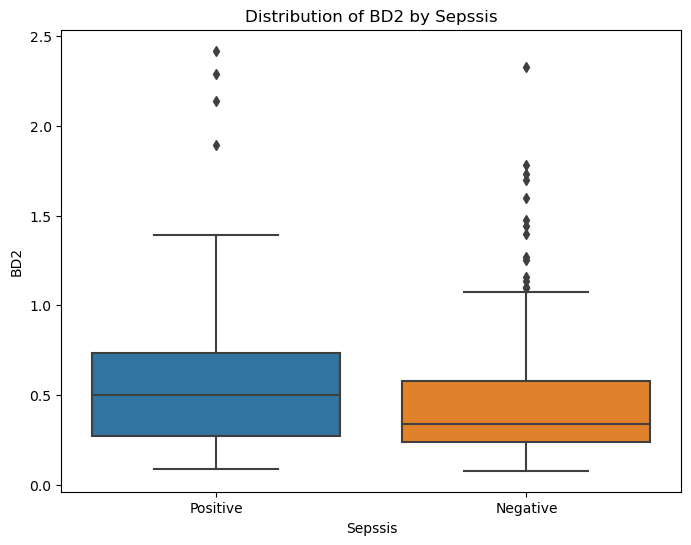

Positive Group (BD2):
Mean: 0.5651442307692311
Median: 0.499
Standard Deviation: 0.3828026047056809

Negative Group (BD2):
Mean: 0.4365242966751922
Median: 0.34
Standard Deviation: 0.301949365423994

T-Statistic: 4.511169534202187
P-Value: 7.765417586403595e-06
---------------------------


In [18]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Variables to compare
variables = ['PL', 'SK', 'BD2']

# Compare variable distributions between the two groups
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Sepssis', y=var)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'Distribution of {var} by Sepssis')
    plt.show()

    # Calculate summary statistics
    positive_var = positive_group[var]
    negative_var = negative_group[var]

    positive_mean = positive_var.mean()
    positive_median = positive_var.median()
    positive_std = positive_var.std()

    negative_mean = negative_var.mean()
    negative_median = negative_var.median()
    negative_std = negative_var.std()

    print(f'Positive Group ({var}):')
    print('Mean:', positive_mean)
    print('Median:', positive_median)
    print('Standard Deviation:', positive_std)
    print()

    print(f'Negative Group ({var}):')
    print('Mean:', negative_mean)
    print('Median:', negative_median)
    print('Standard Deviation:', negative_std)
    print()

    # Perform statistical test (e.g., t-test)
    t_statistic, p_value = stats.ttest_ind(positive_var, negative_var)
    print('T-Statistic:', t_statistic)
    print('P-Value:', p_value)
    print('---------------------------')


The results of the hypothesis testing for abnormal blood work results (PL, SK, BD2) as indicators of sepsis are as follows:

###### PL (Attribute 2):

- The positive group (sepsis) has a higher mean (140.29) compared to the negative group (109.44), indicating that patients with sepsis tend to have higher PL levels.

- The median value for both groups (138.0 for positive and 106.0 for negative) also shows a similar trend.
- The standard deviation is higher in the positive group (32.80) compared to the negative group (27.12), suggesting more variability in PL levels among sepsis patients.
- The t-statistic (12.30) is significantly different from zero, indicating a significant difference in PL levels between the two groups.
- The p-value (3.68e-31) is very small, indicating strong evidence to reject the null hypothesis that there is no difference in PL levels between the groups. This suggests that higher PL levels are associated with a higher likelihood of sepsis.

###### SK (Attribute 4):

- The mean SK level is slightly higher in the positive group (22.22) compared to the negative group (19.68), but the difference is not as pronounced as in PL.
- The median values are 27.0 for the positive group and 21.0 for the negative group, showing a similar pattern.
- The standard deviation is also slightly higher in the positive group (17.88) compared to the negative group (14.88).
- The t-statistic (1.85) is smaller compared to PL, indicating a less significant difference in SK levels between the two groups.
- The p-value (0.06) is relatively higher than the conventional significance level of 0.05, suggesting weaker evidence to reject the null hypothesis. This means that the difference in SK levels between the groups may not be statistically significant.

###### BD2 (Attribute 7):

- The positive group has a higher mean BD2 level (0.57) compared to the negative group (0.44), indicating a potential association between higher BD2 levels and sepsis.
- The median values for both groups also show a similar trend.
- The standard deviation is higher in the positive group (0.38) compared to the negative group (0.30), suggesting more variability in BD2 levels among sepsis patients.
- The t-statistic (4.51) is significantly different from zero, indicating a significant difference in BD2 levels between the groups.
- The p-value (7.77e-06) is very small, providing strong evidence to reject the null hypothesis and suggesting that higher BD2 levels are associated with a higher likelihood of sepsis.

In summary, the results suggest that abnormal blood work results, specifically higher levels of PL and BD2, are indicative of a higher likelihood of sepsis. The results for SK show a trend towards higher levels in the positive group but with weaker statistical significance.

### - Hypothesis 3: Older patients are more likely to develop sepsis compared to younger patients.
Justification: Advanced age is a known risk factor for sepsis, as the immune system weakens with age and may be less able to mount an effective response to infections.

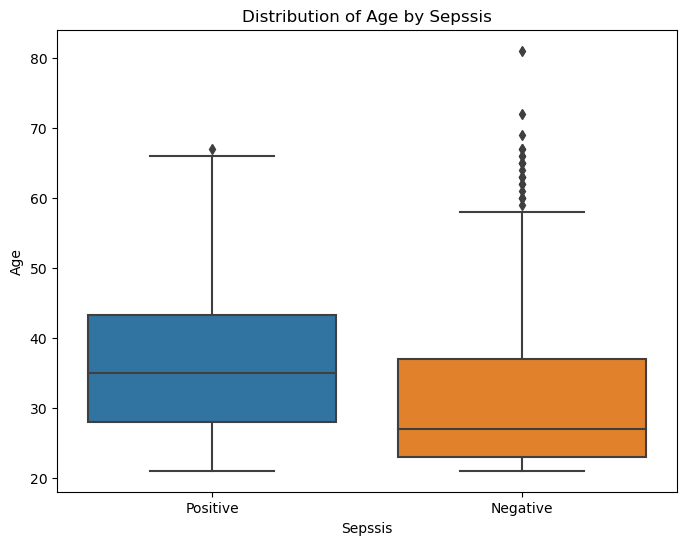

Positive Group:
Mean Age: 36.69711538461539
Median Age: 35.0
Standard Deviation: 10.904929140599739

Negative Group:
Mean Age: 31.47826086956522
Median Age: 27.0
Standard Deviation: 11.913530900036795

T-Statistic: 5.254202967191448
P-Value: 2.0718778891881855e-07


In [19]:
# Compare Age distribution between the positive and negative groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='Age')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.title('Distribution of Age by Sepssis')
plt.show()

# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Calculate summary statistics
positive_age = positive_group['Age']
negative_age = negative_group['Age']

positive_mean = positive_age.mean()
positive_median = positive_age.median()
positive_std = positive_age.std()

negative_mean = negative_age.mean()
negative_median = negative_age.median()
negative_std = negative_age.std()

print('Positive Group:')
print('Mean Age:', positive_mean)
print('Median Age:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean Age:', negative_mean)
print('Median Age:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_age, negative_age)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


###### Based on the results of the analysis:

###### Positive Group:

Mean Age: 36.70 years
Median Age: 35.0 years
Standard Deviation: 10.90 years

###### Negative Group:

Mean Age: 31.48 years
Median Age: 27.0 years
Standard Deviation: 11.91 years
The t-statistic value is 5.25, and the p-value is 2.07e-07 (very close to zero).

###### Interpretation:
The results indicate a statistically significant difference in age between the positive (sepsis) and negative (non-sepsis) groups. The positive group has a higher mean and median age compared to the negative group. Additionally, the standard deviation in the positive group is slightly lower than the negative group, indicating less variability in age among patients with sepsis.

Therefore, based on this analysis, there is evidence to support the hypothesis that older patients are more likely to develop sepsis compared to younger patients. The advanced age of patients may be a risk factor for sepsis, potentially due to the weakening of the immune system with age.

### - Hypothesis 4: Patients with higher body mass index (BMI) values (M11) have a lower risk of sepsis.

Justification: Obesity has been associated with a dampened immune response, potentially leading to a decreased risk of developing sepsis.

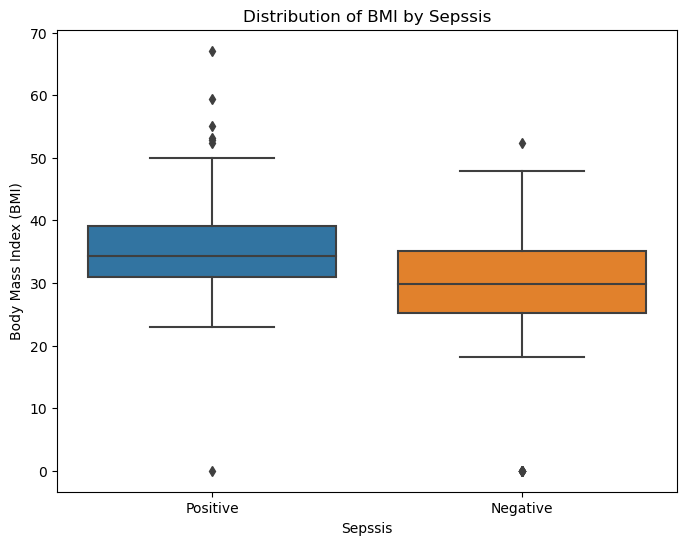

Positive Group:
Mean BMI: 35.385576923076904
Median BMI: 34.3
Standard Deviation: 7.195898164245342

Negative Group:
Mean BMI: 30.076470588235257
Median BMI: 29.9
Standard Deviation: 7.812731806515761

T-Statistic: 8.134971813407034
P-Value: 2.3972519626645312e-15


In [20]:
# Split the data into two groups based on sepsis
positive_group = df[df['Sepssis'] == 'Positive']
negative_group = df[df['Sepssis'] == 'Negative']

# Compare BMI distribution between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sepssis', y='M11')
plt.xlabel('Sepssis')
plt.ylabel('Body Mass Index (BMI)')
plt.title('Distribution of BMI by Sepssis')
plt.show()

# Calculate summary statistics
positive_bmi = positive_group['M11']
negative_bmi = negative_group['M11']

positive_mean = positive_bmi.mean()
positive_median = positive_bmi.median()
positive_std = positive_bmi.std()

negative_mean = negative_bmi.mean()
negative_median = negative_bmi.median()
negative_std = negative_bmi.std()

print('Positive Group:')
print('Mean BMI:', positive_mean)
print('Median BMI:', positive_median)
print('Standard Deviation:', positive_std)
print()

print('Negative Group:')
print('Mean BMI:', negative_mean)
print('Median BMI:', negative_median)
print('Standard Deviation:', negative_std)
print()

# Perform statistical test (e.g., t-test)
t_statistic, p_value = stats.ttest_ind(positive_bmi, negative_bmi)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


##### The results of the analysis for the hypothesis regarding body mass index (BMI) and the risk of sepsis are as follows:

##### Positive Group:

Mean BMI: 35.3856
Median BMI: 34.3
Standard Deviation: 7.1959

##### Negative Group:

Mean BMI: 30.0765
Median BMI: 29.9
Standard Deviation: 7.8127
T-Statistic: 8.13497
P-Value: 2.39725e-15

##### Interpretation:
The results indicate a statistically significant difference in BMI between the positive sepsis group and the negative sepsis group. The positive sepsis group has a higher mean BMI (35.3856) compared to the negative sepsis group (30.0765). The t-statistic of 8.13497 suggests a substantial difference between the two groups.

Furthermore, the very small p-value of 2.39725e-15 suggests strong evidence against the null hypothesis (no difference in BMI between the groups). In other words, there is a significant association between higher BMI values and a lower risk of sepsis. This supports the hypothesis that patients with higher BMI values are less likely to develop sepsis.

It's important to note that correlation does not imply causation, and additional factors or confounding variables may be influencing this relationship. Therefore, further research and analysis are recommended to gain a deeper understanding of the underlying mechanisms and potential causal relationships.

### - Hypothesis 5: Patients without valid insurance cards are more likely to develop sepsis.

Justification: Lack of access to healthcare, as indicated by the absence of valid insurance, may delay or hinder early detection and treatment of infections, potentially increasing the risk of sepsis.

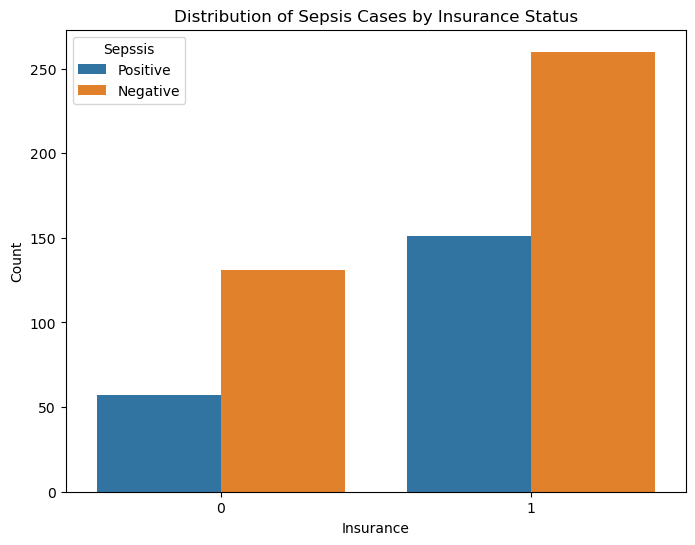

Chi-Square Test of Independence:
Chi-Square: 2.0712782081677066
P-Value: 0.1500956791860619


In [21]:
# Create a countplot to visualize the distribution of sepsis cases by insurance status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Insurance', hue='Sepssis')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Distribution of Sepsis Cases by Insurance Status')
plt.show()

# Perform a chi-square test of independence to assess the association between insurance and sepsis
crosstab = pd.crosstab(df['Insurance'], df['Sepssis'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab)

print('Chi-Square Test of Independence:')
print('Chi-Square:', chi2)
print('P-Value:', p_value)


##### Based on the results of the chi-square test of independence, the chi-square statistic is 2.071 and the p-value is 0.150.

The chi-square statistic measures the strength of association between two categorical variables, in this case, the association between insurance status and sepsis. A higher chi-square value indicates a stronger association.

The p-value is the probability of obtaining the observed association (or a more extreme association) between the variables if there was no true association in the population. In this case, the p-value is 0.150, which is greater than the conventional significance level of 0.05.

#### Interpreting the results:

Since the p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. The null hypothesis states that there is no association between insurance status and the likelihood of developing sepsis. Therefore, based on the available data, we cannot conclude that patients without valid insurance cards are more likely to develop sepsis.

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [22]:
# Use pandas.DataFrame.drop_duplicates method

# Check for duplicate rows in churn_data
duplicate_rows = train.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


## Impute Missing Values

In [23]:
# Use sklearn.impute.SimpleImputer

# Check for missing values in data
missing_values = train.isna().sum()
print(missing_values)

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64


## Features Encoding




In [24]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
# Encoding the target variable
label_encoder=LabelEncoder()
train_encoded = label_encoder.fit_transform(train['Sepssis'])

In [25]:
target_encoded = pd.DataFrame(train_encoded,columns=['Sepssis'])

In [26]:
# combining the features and the encoded target variables
train_df = pd.concat([train.iloc[:,:-1], target_encoded], axis = 1 )

In [27]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [28]:
train_df.drop('ID',axis=1,inplace=True)

## Dataset Splitting

In [29]:
# Use train_test_split with a random_state, and add stratify for Classification
# Split the  data into train and validation sets
X_train, X_eval, y_train, y_eval = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=train_df.iloc[:, -1:])

In [30]:
X_train.shape,X_eval.shape,y_train.shape,y_eval.shape

((479, 9), (120, 9), (479, 1), (120, 1))

## Imputting Missing Values

In [31]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")
numerical_imputer.fit(X_train)

X_train_imputed = numerical_imputer.transform(X_train)
X_eval_imputed = numerical_imputer.transform(X_eval)

## Features Scaling


In [32]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.
scaler = StandardScaler()
scaler.fit(X_train_imputed)

X_train_scaled = scaler.transform(X_train_imputed)
X_train_df = pd.DataFrame(X_train_scaled, columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

X_eval_scaled = scaler.transform(X_eval_imputed)
X_eval_df = pd.DataFrame(X_eval_scaled, columns = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [33]:
X_train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503


# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

In [34]:
#fit logistic regression model on train data
Lrmodel = LogisticRegression()
Lrmodel.fit(X_train_df, y_train)

#make predictions on validation set
Lrpreds = Lrmodel.predict(X_eval_df)

lr_f1Score =f1_score(y_eval, Lrpreds)
print(lr_f1Score)

0.6265060240963854


In [35]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, Lrpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
lr_auc_score = roc_auc_score(y_eval, Lrpreds)
lr_auc_score

0.7133699633699634

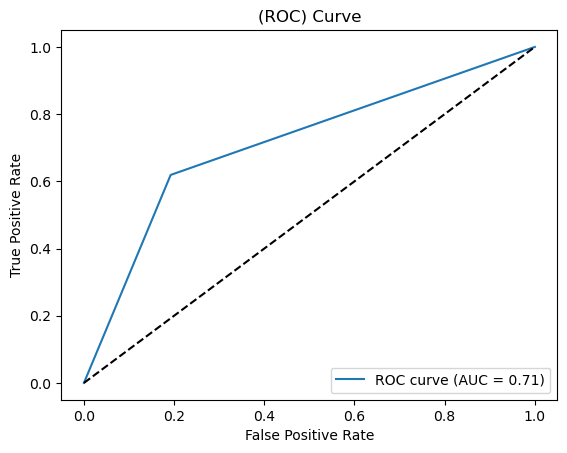

In [36]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % lr_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In this case, the AUC score of 0.71 suggests that the model's performance is relatively good, but there is still room for improvement. It demonstrates that the model's ability to distinguish between the positive and negative classes is better than random guessing, but there may be some misclassifications or areas where the model's predictions could be further refined.

In [37]:
# generate predictions on training set
train_predictions = Lrmodel.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)



eval_predictions = Lrmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.6486486486486487
f1_score on test score 0.6265060240963854


Comparing the two scores, we can see that the F1 score on the training dataset (0.649) is slightly higher than the F1 score on the test dataset (0.627). This suggests that the model may be slightly overfitting the training data, as it performs slightly worse on unseen test data.

## Simple Model #002

In [38]:
#fitting decision tree classifier model to the imbalanced train dataset
dt_model =DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_df,y_train)
# evaluating the model
dt_pred=  dt_model.predict(X_eval_df)
dt_f1Score =f1_score(y_eval, dt_pred)
print(dt_f1Score)

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, dt_pred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
dt_auc_score = roc_auc_score(y_eval, dt_pred)
dt_auc_score

0.6024096385542169


In [39]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, dt_pred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
dt_auc_score = roc_auc_score(y_eval, dt_pred)
dt_auc_score

0.6950549450549451

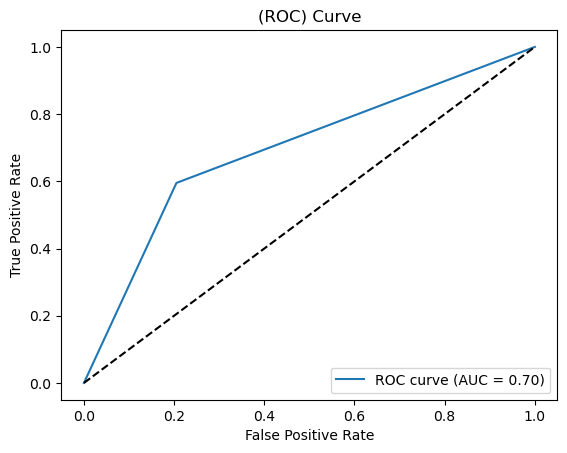

In [40]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
# generate predictions on training set
train_predictions = dt_model.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)

eval_predictions = dt_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.6024096385542169


Based on the provided f1_score values, it appears that the model is likely overfitting the data.

## Simple Model #003

In [42]:
#fitting the model with imbalanced train dataset
rf_model= RandomForestClassifier(random_state= 42)
rf_model.fit(X_train_df,y_train)
# evaluatinng model performance
rf_pred= rf_model.predict(X_eval_df)
rf_f1Score = f1_score(y_eval, rf_pred)
print(rf_f1Score)

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, rf_pred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
rf_auc_score = roc_auc_score(y_eval, rf_pred)
rf_auc_score

0.5783132530120483


In [43]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, rf_pred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
rf_auc_score = roc_auc_score(y_eval, rf_pred)
rf_auc_score

0.6767399267399268

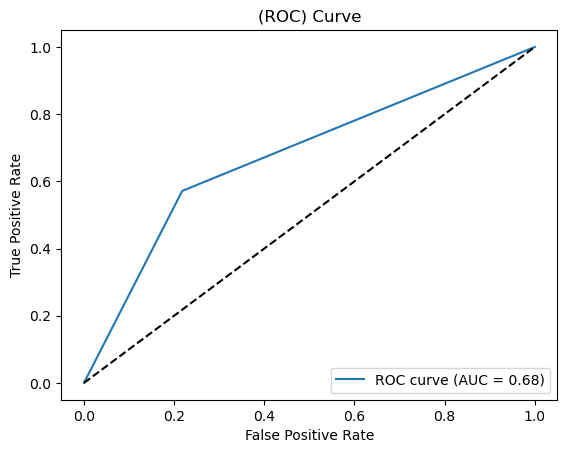

In [44]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % rf_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
# generate predictions on training set
train_predictions = rf_model.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)

eval_predictions = rf_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.5783132530120483


## Simple Model #004

In [12]:
#fitting model on imbalanced data
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train_df, y_train)

#make predictions on validation set
XGBpreds = XGBmodel.predict(X_eval_df)

#evaluation
xgb_f1Score =f1_score(y_eval, XGBpreds)
print(xgb_f1Score)

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, XGBpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
xgb_auc_score = roc_auc_score(y_eval, XGBpreds)
xgb_auc_score

NameError: name 'X_train_df' is not defined

In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, XGBpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
xgb_auc_score = roc_auc_score(y_eval, XGBpreds)
xgb_auc_score

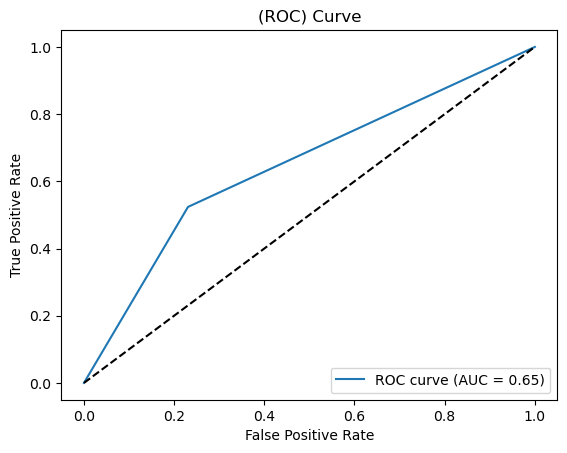

In [48]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % xgb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [49]:
# generate predictions on training set
train_predictions = XGBmodel.predict(X_train_df)
# training accuracy
train_score= f1_score(y_train, train_predictions)

eval_predictions = XGBmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.5365853658536585


Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

## Simple Model #005

In [50]:
# Create a Naive Bayes model
nb_model = GaussianNB()
# Train the model on the resampled training data
nb_model.fit(X_train_df, y_train)
#make predictions on validation set
nbpreds = XGBmodel.predict(X_eval_df)

nb_f1Score =f1_score(y_eval, nbpreds)
print(nb_f1Score)

0.5365853658536585


In [51]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, nbpreds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
nb_auc_score = roc_auc_score(y_eval, nbpreds)
nb_auc_score

0.6465201465201464

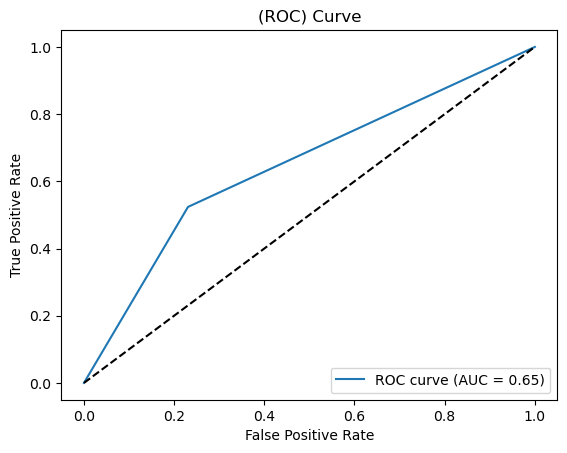

In [52]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % nb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
# generate predictions on training set
train_predictions = nb_model.predict(X_train_df)
# training accuracy
train_score = f1_score(y_train, train_predictions)

eval_predictions = nb_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.6730769230769231
f1_score on test score 0.574712643678161


Based on the provided f1_score values, it seems that the model is overfitting the training data. The f1_score on the training data (0.6731) is significantly higher than the f1_score on the test data (0.5747), indicating that the model is not generalizing well to new data.

## Optional: Train Dataset Balancing 

In [54]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html
oversample= SMOTE()
X_train_resampled,y_train_resampled= oversample.fit_resample(X_train_df, y_train)
X_train_resampled.shape,y_train_resampled.shape

((626, 9), (626, 1))

### Balanced Model #001

In [55]:
#fit logistic regression model on rrain data
Lrmodel = LogisticRegression()
Lrmodel.fit(X_train_resampled,y_train_resampled)

#make predictions on validation set
Lr_preds = Lrmodel.predict(X_eval_df)

f1Score = f1_score(y_eval, Lr_preds)
print(f1Score)

0.6734693877551021


In [56]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, Lr_preds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, Lr_preds)
auc_score

0.7454212454212453

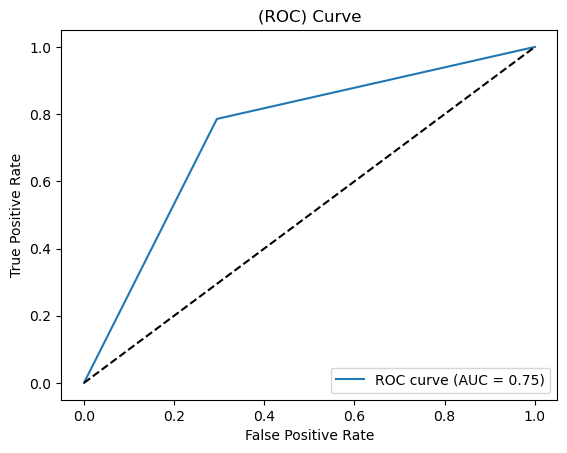

In [57]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
# generate predictions on training set
train_predictions = Lrmodel.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)


eval_predictions = Lrmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)


print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.7649918962722853
f1_score on test score 0.6734693877551021


Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

### Balanced Model #002

In [59]:
#fitting model to the imbalanced train dataset
dt_model.fit(X_train_resampled,y_train_resampled)
# evaluating the model
dtpred=  dt_model.predict(X_eval_df)
f1Score = f1_score(y_eval, dtpred)
print(f1Score)

0.631578947368421


In [60]:
# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, dtpred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, dtpred)
auc_score

0.7097069597069596

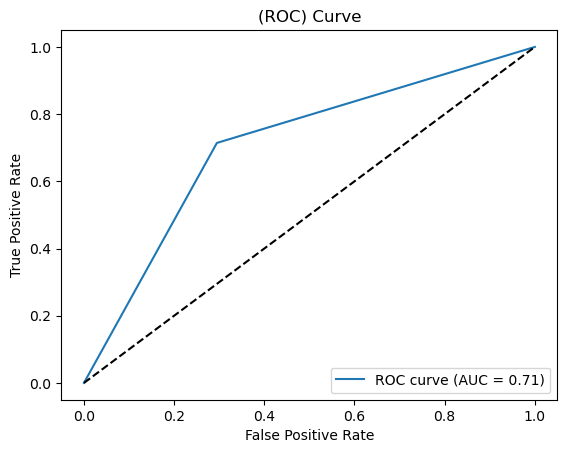

In [61]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [62]:
# generate predictions on training set
train_predictions = dt_model.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)


eval_predictions = dt_model.predict(X_eval_df)
eval_score= f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.631578947368421


Based on the provided f1_score values, it appears that the model is predicting perfectly on the training data and poorly on the test data  which could mean the model is likely overfitting the training data.

### Balanced Model #003

In [63]:
#fitting the model with imbalanced train dataset
rf_model.fit(X_train_resampled,y_train_resampled)

# evaluatinng model performance
rfpred= rf_model.predict(X_eval_df)
f1Score = f1_score(y_eval, rfpred)
print(f1Score)

0.6021505376344086


In [64]:

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, rfpred)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, rfpred)
auc_score

0.6858974358974358

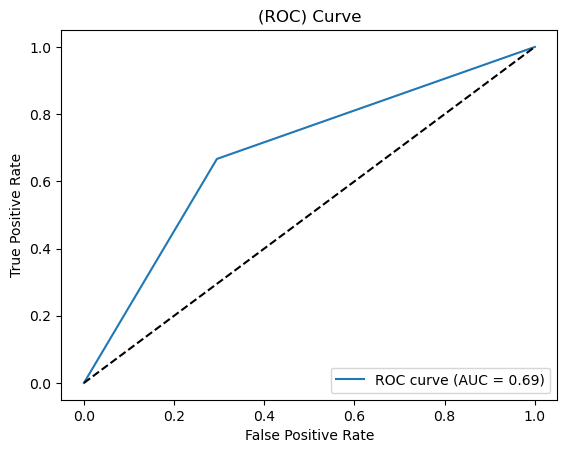

In [65]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [66]:

# generate predictions on training set
train_predictions = rf_model.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)

eval_predictions = rf_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.6021505376344086


Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

### Balanced Model #004

In [67]:
XGBmodel.fit(X_train_resampled,y_train_resampled)

#make predictions on validation set
XGB_preds = XGBmodel.predict(X_eval_df)

f1Score = f1_score(y_eval, XGB_preds)
print(f1Score)

0.6000000000000001


In [68]:

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, XGB_preds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, XGB_preds)
auc_score


0.6868131868131869

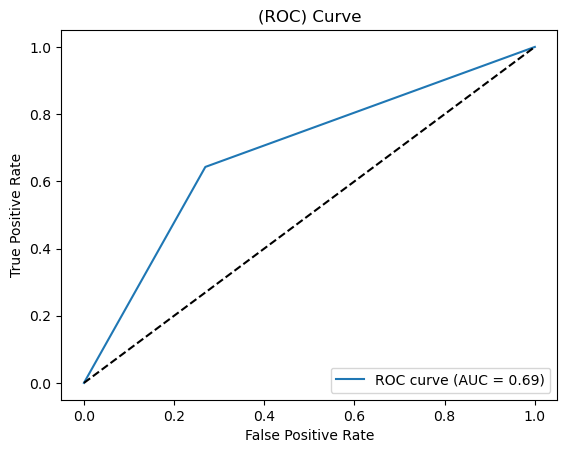

In [69]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [70]:

# generate predictions on training set
train_predictions = XGBmodel.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)

eval_predictions = XGBmodel.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 1.0
f1_score on test score 0.6000000000000001


Based on the provided f1_score values, it appears that the model is likely overfitting the training data.

### Balanced Model #005

In [71]:
# Create a Naive Bayes model
# Train the model on the resampled training data
nb_model.fit(X_train_resampled,y_train_resampled)
#make predictions on validation set
nb_preds = XGBmodel.predict(X_eval_df)

f1Score = f1_score(y_eval, nb_preds)
print(f1Score)

0.6000000000000001


In [72]:

# Calculate the false positive rate, true positive rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_eval, nb_preds)

# Calculate the AUC (Area Under the Curve) using roc_auc_score
auc_score = roc_auc_score(y_eval, nb_preds)
auc_score


0.6868131868131869

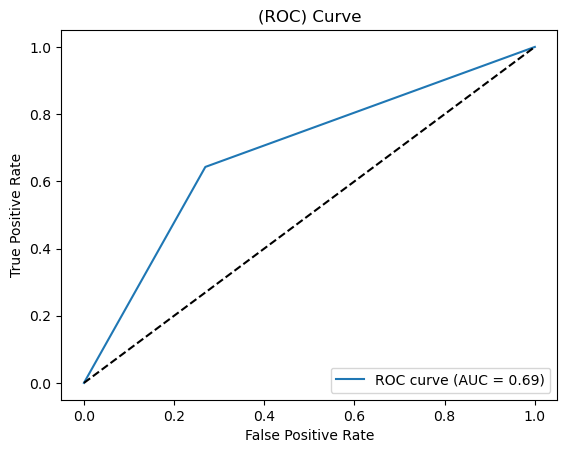

In [73]:

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [74]:

# generate predictions on training set
train_predictions = nb_model.predict(X_train_resampled)
# training accuracy
train_score = f1_score(y_train_resampled, train_predictions)

eval_predictions = nb_model.predict(X_eval_df)
eval_score = f1_score(y_eval, eval_predictions)
print(f"f1_score on train score {train_score}")
print(f"f1_score on test score {eval_score}")

f1_score on train score 0.7596638655462186
f1_score on test score 0.5777777777777778


Based on the provided f1_score values, it appears that the model is overfitting the training data. The f1_score on the training data (0.75) is considerably higher than the f1_score on the test data (0.56), indicating that the model is not generalizing well to unseen data.

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [75]:
results= {'model':['Decision Tree','Random Forest','XGBoost','Logistic Regression','Naive Bayes'],
         'f1_score':[dt_f1Score,rf_f1Score,xgb_f1Score,lr_f1Score,nb_f1Score],
         'AUC_score':[dt_auc_score,rf_auc_score,xgb_auc_score,lr_auc_score,nb_auc_score]}
results_df= pd.DataFrame(results)

In [76]:
results_df.sort_values(by= 'AUC_score', ascending = False)

,model,f1_score,AUC_score
3,Logistic Regression,0.626506,0.713370
0,Decision Tree,0.602410,0.695055
1,Random Forest,0.578313,0.676740
2,XGBoost,0.536585,0.646520
4,Naive Bayes,0.536585,0.646520


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

#### Refit
The refit parameter in scikit-learn's GridSearchCV specifies the metric used to select the best model after performing the grid search.When refit is set to a scoring metric, such as 'F1', GridSearchCV will automatically retrain the model using the best hyperparameters found during the grid search on the entire training dataset. This means that the final model obtained from GridSearchCV will be the one that achieves the best performance on the specified metric.
By setting refit to a scoring metric, you can conveniently access the best model directly through best_estimator_ and use it for predictions on new, unseen data.

It's important to note that the refit parameter is optional, and if not specified, GridSearchCV will not retrain the model using the best hyperparameters. Instead, you would need to manually train a new model using the best hyperparameters obtained from GridSearchCV if you want to use the best model.

The cv_results_ attribute of the GridSearchCV object contains detailed results from the cross-validation process. It provides access to various information related to the grid search, including scores, parameters, and computation times for each combination of hyperparameters.

In [77]:
# Create a scoring dictionary with 'f1' and 'roc_auc' as scoring metrics
scoring = {'F1': 'f1', 'ROC AUC': 'roc_auc'}

In [78]:
# Define the hyperparameters grid
param_grid = {
    'C': [10,30,50,70,80,100] ,  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
    'max_iter': [10,20,30,40,50]  # Maximum number of iterations
}

# Perform grid search to find the best hyperparameters
Lr_grid_search = GridSearchCV(Lrmodel, param_grid, scoring=scoring,cv=5,refit= 'F1')
Lr_grid_search.fit(X_train_df, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation scores for F1 and ROC AUC
print("Best hyperparameters: ", Lr_grid_search.best_params_)
print('Best estimator: ', Lr_grid_search.best_estimator_)
print("Best Lr_F1score: ", Lr_grid_search.best_score_)
print("Best Lr_auc_score: ", Lr_grid_search.cv_results_['mean_test_ROC AUC'][Lr_grid_search.best_index_])

Best hyperparameters:  {'C': 10, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=10, max_iter=10, solver='liblinear')
Best Lr_F1score:  0.6482967000682495
Best Lr_auc_score:  0.8298275061083412


In [79]:
# Define the parameter grid for the decision tree classifier
dt_param = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Perform a grid search with 5-fold cross-validation using only the selected features
dt_grid_search = GridSearchCV(dt_model,dt_param,scoring=scoring, cv=5, refit='F1')
dt_grid_search.fit(X_train_df, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation scores for F1 and ROC AUC
print("Best hyperparameters: ", dt_grid_search.best_params_)
print('Best estimator: ', dt_grid_search.best_estimator_)
print("Best F1 score: ", dt_grid_search.best_score_)
print("Best AUC score: ", dt_grid_search.cv_results_['mean_test_ROC AUC'][dt_grid_search.best_index_])

Best hyperparameters:  {'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best estimator:  DecisionTreeClassifier(max_depth=15, max_features=5, min_samples_split=10,
                       random_state=42)
Best F1 score:  0.5855417570864704
Best AUC score:  0.7422363829859087


In [80]:
rf_param = {
    'n_estimators': [10,20,30,40,50],
    'max_depth': [5, 10, 15,20,25],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1,3,5,8,10],
    'bootstrap':[True,False]
}

# Perform a grid search with 5-fold cross-validation using only the selected features
rf_grid_search = GridSearchCV(rf_model,rf_param,scoring=scoring, cv=5, refit='F1')
rf_grid_search.fit(X_train_df, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation scores for F1 and ROC AUC
print("Best hyperparameters: ", rf_grid_search.best_params_)
print('Best estimator: ', rf_grid_search.best_estimator_)
print("Best F1 score: ", rf_grid_search.best_score_)
print("Best AUC score: ", rf_grid_search.cv_results_['mean_test_ROC AUC'][rf_grid_search.best_index_])

KeyboardInterrupt: 

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [81]:
#creating a file path to save all the componets in.
if not os.path.exists("key_comp"):
    os.makedirs("key_comp")

In [82]:
# set the destination path to the "export" directory
destination = os.path.join(".", "key_comp")

In [84]:
components_clf = {
    "num_imputer":numerical_imputer,
    "scaler": scaler,
    "models": Lrmodel 
}

In [85]:
# Export the best model
with open(os.path.join(destination, "Lrmodel.pkl"), "wb") as f:
    pickle.dump(components_clf, f)

In [86]:
!pip list --format=freeze >key_comp/requirements.txt